# Bite Size Bayes

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

## Review

[In the previous notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/03_cookie.ipynb) we started with Bayes's Theorem, written like this:

$P(A|B) = P(A) ~ P(B|A) ~/~ P(B)$

And applied it to the case where we use data, $D$, to update the probability of a hypothesis, $H$.  In this context, we write Bayes's Theorem like this:

$P(H|D) = P(H) ~ P(D|H) ~/~ P(D)$

And give each term a name:

* $P(H)$ is the "prior probability" of the hypothesis, which represents how confident you are that $H$ is true prior to seeing the data,

* $P(D|H)$ is the "likelihood" of the data, which is the probability of seeing $D$ if the hypothesis is true,

* $P(D)$ is the "total probability of the data", that is, the chance of seeing $D$ regardless of whether $H$ is true or not.

* $P(H|D)$ is the "posterior probability" of the hypothesis, which indicates how confident you should be that $H$ is true after taking the data into account.

We used Bayes's Theorem to solve a cookie-related problem, and I presented the Bayes table, a way to solve Bayesian problems more generally.  I didn't really explain how it works, though.  That's the goal of this notebook.

I'll start by extending the table method to a problem with more than two hypotheses.

## More hypotheses

One nice thing about the table method is that it works with more than two hypotheses.  As an example, let's do another version of the cookie problem.

Suppose you have five bowls:

* Bowl 0 contains no vanilla cookies.

* Bowl 1 contains 25% vanilla cookies.

* Bowl 2 contains 50% vanilla cookies.

* Bowl 3 contains 75% vanilla cookies.

* Bowl 4 contains 100% vanilla cookies.

Now suppose we choose a bowl at random and then choose a cookie, and we get a vanilla cookie.  What is the posterior probability that we chose each bowl?

Here's a table that represents the five hypotheses and their prior probabilities:

In [1]:
import pandas as pd

table = pd.DataFrame()
table['prior'] = 1/5, 1/5, 1/5, 1/5, 1/5
table

,prior
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


The likelihood of drawing a vanilla cookie from each bowl is the given proportion of vanilla cookies:

In [2]:
table['likelihood'] = 0, 0.25, 0.5, 0.75, 1
table

,prior,likelihood
0,0.2,0.00
1,0.2,0.25
2,0.2,0.50
3,0.2,0.75
4,0.2,1.00


Once we have priors and likelihoods, the remaining steps are always the same.  We compute the unnormalized posteriors:

In [3]:
table['unnorm'] = table['prior'] * table['likelihood']
table

,prior,likelihood,unnorm
0,0.2,0.00,0.00
1,0.2,0.25,0.05
2,0.2,0.50,0.10
3,0.2,0.75,0.15
4,0.2,1.00,0.20


And the total probability of the data.

In [4]:
prob_data = table['unnorm'].sum()
prob_data

0.5

Then divide through to get the normalized posteriors.

In [5]:
table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,unnorm,posterior
0,0.2,0.00,0.00,0.0
1,0.2,0.25,0.05,0.1
2,0.2,0.50,0.10,0.2
3,0.2,0.75,0.15,0.3
4,0.2,1.00,0.20,0.4


Two things you might notice about these results:

1. One of the hypotheses has a posterior probability of 0, which means it has been ruled out entirely.  And that makes sense: Bowl 0 contains no vanilla cookies, so if we get a vanilla cookie, we know it's not from Bowl 0.

2. The posterior probabilities form a straight line.  We can see this more clearly by plotting the results.

In [6]:
import matplotlib.pyplot as plt

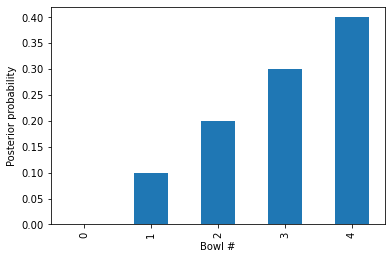

In [7]:
table['posterior'].plot(kind='bar')
plt.xlabel('Bowl #')
plt.ylabel('Posterior probability');

**Exercise:**  Use the table method to solve the following problem and plot the results as a bar chart.

>The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  
>
>Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown).
>
>A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

Hint: If the yellow came from 1994, the green must have come from 1996.  By Theorem 2 (conjunction), the likelihood of this combination is (0.2)(0.2).

In [8]:
# Solution goes here

In [9]:
# Solution goes here

## Why does this work?

Now I will explain how the table method works, making two arguments:

1. First, I'll show that it makes sense to normalize the posteriors so they add up to 1.

2. Then I'll show that this step is consistent with Bayes's Theorem, because the total of the unnormalized posteriors is the total probability of the data, $P(D)$.

Here's the first argument.  Let's start with Bayes's Theorem:

$P(H|D) = P(H) ~ P(D|H)~/~P(D)$

Notice that the denominator, $P(D)$, does not depend on $H$, so it is the same for all hypotheses.  If we factor it out, we get:

$P(H|D) \sim P(H) ~ P(D|H)$

which says that the posterior probabilities *are proportional to* the unnormalized posteriors.  In other words, if we leave out $P(D)$, we get the proportions right, but not the total.

Then how do we figure out the total?  Well, in this example we know that the cookie came from exactly one of the bowls.  So the hypotheses are:

* Mutually exclusive, that is, only one of them can be true, and

* Collectively exhaustive, that is, at least one of them must be true.

Exactly one of the hypotheses must be true, so the posterior probabilities have to add up to 1.  Most of the time, the unnormalized posteriors don't add up to 1, but when we divide through by the total, we ensure that the *normalized* posteriors do.

That's the first argument.  I hope it makes some sense, but if you don't find it entirely satisfying, keep going.

## Rolling the dice

Before I can make the second argument, we need one more law of probability, which I will explain with a new example:

> Suppose you have a 4-sided die and a 6-sided die.  You choose one at random and roll it.  What is the probability of getting a 1?

To answer that, I'll define two hypotheses and a datum:

* $H_4$: You chose the 4-sided die.

* $H_6$: You chose the 6-sided die.

* $D$: You rolled a 1.

On a 4-sided die, the probability of rolling 1 is $1/4$; on a 6-sided die it is $1/6$.  So we can write the conditional probabilities:

$P(D|H_4) = 1/4$

$P(D|H_6) = 1/6$

And if the probability of choosing either die is equal, we know the prior probabilities:

$P(H_4) = 1/2$

$P(H_6) = 1/2$

But what is the total probability of the data, $P(D)$?

At this point your intuition might tell you that it is the weighted sum of the conditional probabilities:

$P(D) = P(H_4)P(D|H_4) + P(H_6)P(D|H_6)$

Which is

$P(D) = (1/2)(1/4) + (1/2)(1/6)$

Which is

In [10]:
(1/2)*(1/4) + (1/2)*(1/6)

0.20833333333333331

And that's correct.  But if your intuition did not tell you that, or if you would like to see something closer to a proof, keep going.

## Disjunction

In this example, we can describe the outcome in terms of logical operators like this:

> The outcome is 1 if you choose the 4-sided die **and** roll 1 **or** you roll the 6-sided die **and** roll 1.

Using math notation, $D$ is true if:

$(H_4 ~and~ D) ~or~ (H_6 ~and~ D)$

We've already seen the $and$ operator, also known as "conjunction", but we have not yet seen the $or$ operator, which is also known as "disjunction"?

For that, we a new rule, which I'll call **Theorem 4**:

$P(A ~or~ B) = P(A) + P(B) - P(A ~and~ B)$

To see why that's true, let's take a look at the Venn diagram:

<img width="200" src="https://github.com/AllenDowney/BiteSizeBayes/raw/master/theorem4_venn_diagram.png">

What we want is the total of the blue, red, and purple regions.  If we add $P(A)$ and $P(B)$, we get the blue and red regions right, but we double-count the purple region.  So we have to subtract off one purple region, which is $P(A ~and~ B)$.

**Exercise:** Let's do a quick example using disjunction.  

A standard deck of playing cards contains 52 cards; 

* 26 of them are red, 

* 12 of them are face cards, and 

* 6 of them are red face cards.

The following diagram shows what I mean: the red rectangle contains the red cards; the blue rectangle contains the face cards, and the overlap includes the red face cards.

<img width="500"
     src="https://github.com/AllenDowney/BiteSizeBayes/raw/master/card_venn_diagram.png">


If we choose a card at random, here are the probabilities of choosing a red card, a face card, and a red face card:

In [11]:
p_red = 26/52
p_face = 12/52
p_red_face = 6/52

p_red, p_face, p_red_face

(0.5, 0.23076923076923078, 0.11538461538461539)

Use Theorem 4 to compute the probability of choosing a card that is either red, or a face card, or both:

In [12]:
# Solution goes here

## Total probability

In the dice example, $H_4$ and $H_6$ are mutually exclusive, which means only one of them can be true, so the purple region is 0.  Therefore:

$P(D) = P(H_4 ~and~ D) + P(H_6 ~and~ D) - 0$

Now we can use **Theorem 2** to replace the conjunctions with conditonal probabilities:

$P(D) = P(H_4)~P(D|H_4) + P(H_6)~P(D|H_6)$

By a similar argument, we can show that this is true for any number of hypotheses.  For example, if we add an 8-sided die to the mix, we can write:

$P(D) = P(H_4)~P(D|H_4) + P(H_6)~P(D|H_6) + P(H_8)~P(D|H_8)$

And more generally, with any number of hypotheses $H_i$:

$P(D) = \sum_i P(H_i)~P(D|H_i)$

Which shows that the total probability of the data is the sum of the unnormalized posteriors.

And that's why the table method works.

Now let's get back to the original question:

> Suppose you have a 4-sided die and a 6-sided die.  You choose one at random and roll it.  What is the probability of getting a 1?

We can use a Bayes table to compute the answer.  Here are the priors:

In [13]:
table = pd.DataFrame(index=['H4', 'H6'])
table['prior'] = 1/2, 1/2
table

,prior
H4,0.5
H6,0.5


And the likelihoods:

In [14]:
table['likelihood'] = 1/4, 1/6
table

,prior,likelihood
H4,0.5,0.250000
H6,0.5,0.166667


Now we compute the unnormalized posteriors in the usual way:

In [15]:
table['unnorm'] = table['prior'] * table['likelihood']
table

,prior,likelihood,unnorm
H4,0.5,0.250000,0.125000
H6,0.5,0.166667,0.083333


And the total probability of the data:

In [16]:
prob_data = table['unnorm'].sum()
prob_data

0.20833333333333331

That's what we got when we solved the problem by hand, so that's good.

**Exercise:** Suppose you have a 4-sided, 6-sided, and 8-sided die.  You choose one at random and roll it, what is the probability of getting a 1?

Do you expect it to be higher or lower than in the previous example?

In [17]:
# Solution goes here

In [18]:
# Solution goes here

## Prediction and inference

In the previous section, we use a Bayes table to solve this problem:

> Suppose you have a 4-sided die and a 6-sided die.  You choose one at random and roll it.  What is the probability of getting a 1?

I'll call this a "prediction problem" because we are given a scenario and asked for the probability of a predicted outcome.

Now let's solve a closely-related problem:

> Suppose you have a 4-sided die and a 6-sided die.  You choose one at random, roll it, and get a 1.  What is the probability that the die you rolled is 4-sided?

I'll call this an "inference problem" because we are given the outcome and asked to figure out, or "infer", which die was rolled.

Here's a solution:

In [19]:
table = pd.DataFrame(index=['H4', 'H6'])
table['prior'] = 1/2, 1/2
table['likelihood'] = 1/4, 1/6
table['unnorm'] = table['prior'] * table['likelihood']
prob_data = table['unnorm'].sum()
table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,unnorm,posterior
H4,0.5,0.250000,0.125000,0.6
H6,0.5,0.166667,0.083333,0.4


Given that the outcome is a 1, there is a 60% chance the die you rolled was 4-sided.

As this example shows, prediction and inference closely-related problems, and we can use the same methods for both.

**Exercise:** Let's add some more dice:

1. Suppose you have a 4-sided, 6-sided, 8-sided, and 12-sided die.  You choose one at random and roll it.  What is the probabily of getting a 1?

2. Now suppose the outcome is a 1. What is the probability that the die you rolled is 4-sided?  And what are the posterior probabilities for the other dice?

In [20]:
# Solution goes here

In [21]:
# Solution goes here

## Summary

In this notebook, I introduced a new law of probability, so now we have four:

**Theorem 1** gives us a way to compute a conditional probability using a conjunction:

$P(A|B) = \frac{P(A~\mathrm{and}~B)}{P(B)}$ 

**Theorem 2** gives us a way to compute a conjunction using a conditional probability:

$P(A~\mathrm{and}~B) = P(B) P(A|B)$

**Theorem 3** gives us a way to get from $P(A|B)$ to $P(B|A)$, or the other way around:

$P(A|B) = \frac{P(A) P(B|A)}{P(B)}$

**Theorem 4** gives us a way to compute a disjunction using a conjunction.

$P(A ~or~ B) = P(A) + P(B) - P(A ~and~ B)$

Then we used Theorems 2 and 4 to show that the sum of the unnormalized posteriors is the total probability of the data, which we wrote like this:

$P(D) = \sum_i P(H_i)~P(D|H_i)$

This conclusion is useful for two reasons:

1. It provides a way to compute the probability of future data using prior probabilities and likelihoods, and

2. It explains why the Bayes table method works.

[In the next notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/05_test.ipynb) we will explore a famously useful application of Bayes's Theorem, medical testing.